In [8]:
import pandas,matplotlib.pyplot as plt, seaborn, numpy

In [9]:
#DATA PROFILING#
data = pandas.read_csv("DATA PENJUALAN ALAT KANTOR.csv") #load dataset
df = pandas.DataFrame(data) #modelling
print(f"Rata-rata\n\tPenjualan = {df['Penjualan'].mean()}\n\tKuantitas = {df['Kuantitas'].mean()}\n\tProfit = {df['Profit'].mean()}") #mean
print(f"Median\n\tPenjualan = {df['Penjualan'].median()}\n\tKuantitas = {df['Kuantitas'].median()}\n\tProfit = {df['Profit'].median()}") #median
print(f"Modus\n\tID Konsumen = {df['ID Konsumen'].mode().values[0]}\n\tSegmen = {df['Segmen'].mode().values[0]}\n\tRegion = {df['Region'].mode().values[0]}\n\tProduct ID = {df['Product ID'].mode().values[0]}\n\tKategori = {df['Kategori'].mode().values[0]}\n\tSub-Kategori = {df['Sub-Kategori'].mode().values[0]}") #modus
print(f"Varians\n\tPenjualan = {df['Penjualan'].var()}\n\tKuantitas = {df['Kuantitas'].var()}\n\tProfit = {df['Profit'].var()}") #variance
print(f"Simpang baku\n\tPenjualan = {df['Penjualan'].std()}\n\tKuantitas = {df['Kuantitas'].std()}\n\tProfit = {df['Profit'].std()}") #standard deviation

Rata-rata
	Penjualan = 227857.7417302799
	Kuantitas = 3.800254452926209
	Profit = 92020.38676844783
Median
	Penjualan = 224717.5
	Kuantitas = 3.0
	Profit = 80616.5
Modus
	ID Konsumen = CG-12520
	Segmen = Konsumen
	Region = Timur
	Product ID = PER-PA-10001970
	Kategori = Peralatan Kantor
	Sub-Kategori = Binders
Varians
	Penjualan = 16895689912.140854
	Kuantitas = 5.133299298228553
	Profit = 39432541693.63111
Simpang baku
	Penjualan = 129983.42168192394
	Kuantitas = 2.26567855138997
	Profit = 198576.28683614545


In [10]:
#NULL VALUES DETECTING#
df.isnull().sum() #check null values

ID Konsumen       0
Segmen           47
Region           47
Product ID        0
Kategori          0
Sub-Kategori    214
Penjualan       214
Kuantitas       214
Profit          214
Retur 1           0
Retur 2           0
dtype: int64

In [11]:
#NULL VALUES HANDLING#
df["Segmen"] = df.Segmen.fillna(df.Segmen.mode().values[0])
df["Region"] = df.Region.fillna(df.Region.mode().values[0])
df["Sub-Kategori"] = df["Sub-Kategori"].fillna(df["Sub-Kategori"].mode().values[0])
df["Penjualan"] = df.Penjualan.fillna(df.Penjualan.median())
df["Kuantitas"] = df.Kuantitas.fillna(df.Kuantitas.median())
df["Profit"] = df.Profit.fillna(df.Profit.median())
df.isnull().sum() #check null values

ID Konsumen     0
Segmen          0
Region          0
Product ID      0
Kategori        0
Sub-Kategori    0
Penjualan       0
Kuantitas       0
Profit          0
Retur 1         0
Retur 2         0
dtype: int64

Penjualan


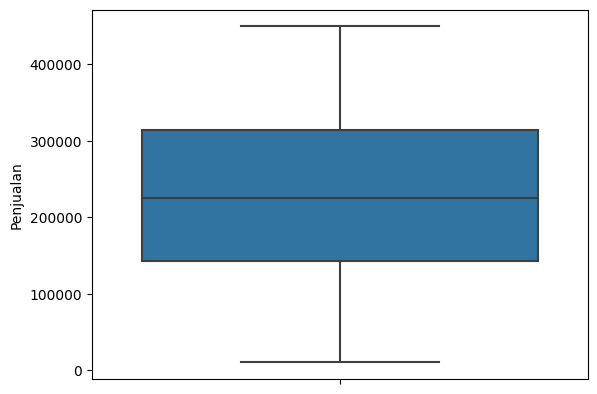

Kuantitas


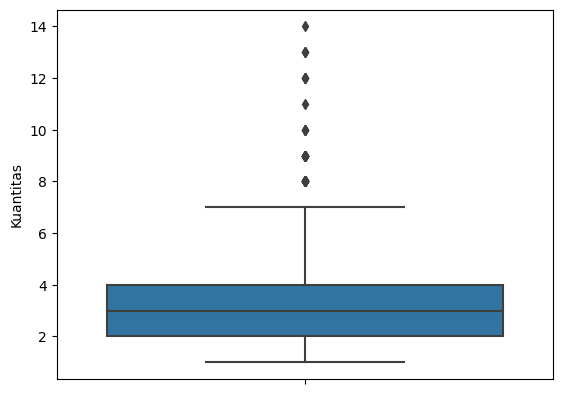

Profit


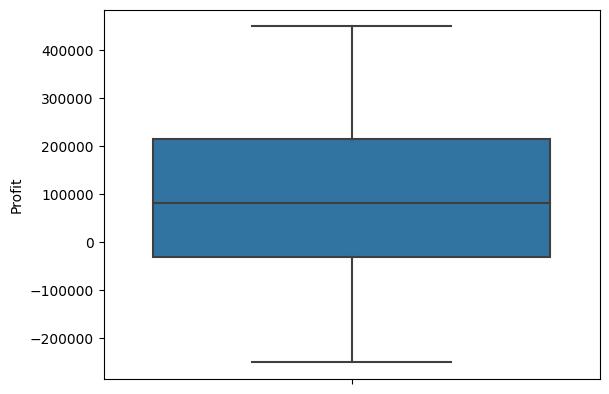

In [12]:
#OUTLIERS DETECTION 1#
cols = df.columns[6:9]
for i in cols:
    print(i)
    seaborn.boxplot(y=df[i])
    plt.show()

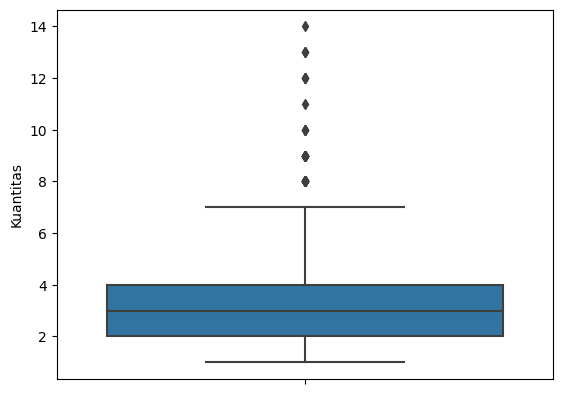

Banyak outliers dibawah lower bound -1.0 = 0
Banyak outliers diatas upper bound 7.0 = 56


In [14]:
#OUTLIERS DETECTION 2#
seaborn.boxplot(y=df["Kuantitas"])
plt.show()
Q1, Q3 = df["Kuantitas"].quantile(0.25),df["Kuantitas"].quantile(0.75)
LB, UB = Q1 - 1.5 * (Q3 - Q1),Q3 + 1.5 * (Q3 - Q1)
under_lb = numpy.where(df["Kuantitas"] < LB)
over_ub = numpy.where(df["Kuantitas"] > UB)
print(f"Banyak outliers dibawah lower bound {LB} = {len(under_lb[0])}")
print(f"Banyak outliers diatas upper bound {UB} = {len(over_ub[0])}")

C:\Users\Raka\AppData\Local\Temp\ipykernel_11656\970030670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kuantitas"][i] = median
C:\Users\Raka\AppData\Local\Temp\ipykernel_11656\970030670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kuantitas"][i] = median
C:\Users\Raka\AppData\Local\Temp\ipykernel_11656\970030670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Kuantitas"][i] = median
C:\Users\Raka\AppData\

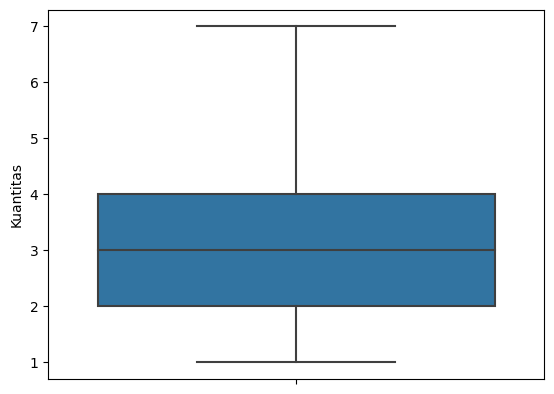

In [16]:
#OUTLIERS REMOVAL#
median = df["Kuantitas"].median()
for i in over_ub[0]:
    df["Kuantitas"][i] = median
seaborn.boxplot(y=df["Kuantitas"])
plt.show()